In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#from google.colab import files
#uploaded = files.upload()
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 3.5MB/s 


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#import io
test=pd.read_csv('/content/drive/My Drive/ML/Digits/test.csv')#pd.read_csv(io.BytesIO(uploaded['test.csv']))
train = pd.read_csv('/content/drive/My Drive/ML/Digits/train.csv')#pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [0]:
train.keys()

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [0]:
#train.iloc[:1,:]
train.shape

(42000, 785)

(28, 28)


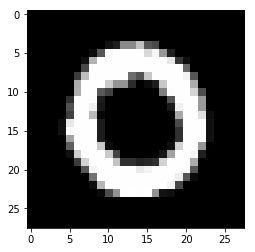

(28, 28)


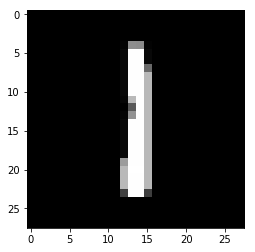

(28, 28)


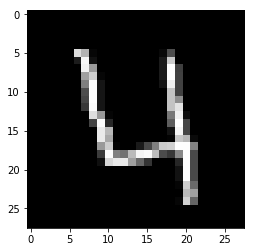

(28, 28)


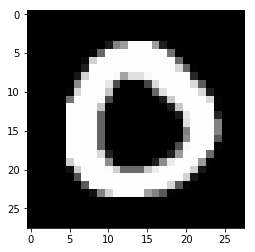

(28, 28)


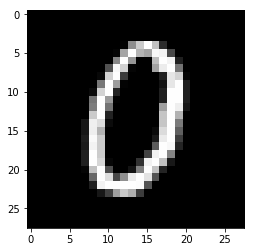

In [0]:
def  showdigit(dumm) :
  for dum in dumm:
   dum=np.resize(dum,(28,28))
   print(dum.shape)
   plt.imshow(dum,cmap='gray')
   plt.show()

showdigit(train.iloc[1:6,1:].values)    

In [0]:
XT=train.iloc[:,1:].values
#XT[1:10,:]
Xt=test.values
Xt[:10:]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
YT=train.iloc[:,:1].values
YT[:10]

array([[1],
       [0],
       [1],
       [4],
       [0],
       [0],
       [7],
       [3],
       [5],
       [3]])

In [0]:
from keras.utils import to_categorical

def rs(X,Y):
 X=X.reshape((-1,28,28,1))
 X=X/255.0 

 Y=to_categorical(Y) 

 return X,Y

Using TensorFlow backend.


In [0]:
XT,YT=rs(XT,YT)

In [0]:
print(XT.shape,YT.shape)

(42000, 28, 28, 1) (42000, 10)


In [0]:
from keras import models
from keras.layers import *
from keras import optimizers

In [0]:
model=models.Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
model.add(MaxPool2D(2,2))


model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
model.add(MaxPool2D(2,2))
model.add(Flatten())


model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))


In [0]:
#opt=optimizers.adam
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 64)                200768    
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)              

In [0]:
#XT_new.shape
hist=model.fit(XT,YT,epochs=10,batch_size=1024,validation_split=0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 2s 70us/step - loss: 0.0199 - acc: 0.9940 - val_loss: 0.0392 - val_acc: 0.9893
Epoch 2/10
32768/33600 [============================>.] - ETA: 0s - loss: 0.0164 - acc: 0.9951

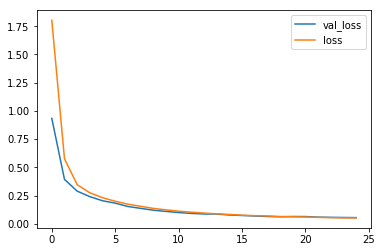

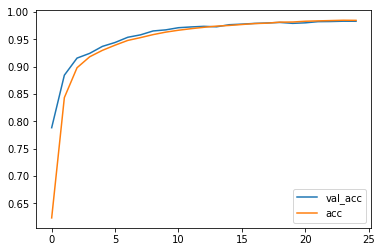

In [0]:

h=hist.history
h.keys()

plt.plot(h['val_loss'],label="val_loss")
plt.plot(h['loss'],label='loss')
plt.legend()
plt.show()


plt.plot(h['val_acc'],label="val_acc")
plt.plot(h['acc'],label='acc')
plt.legend()
plt.show()

In [0]:
test.shape

(28000, 784)

In [0]:

Xt=test.values
print(Xt.shape)

Xt=Xt.reshape(-1,28,28,1)
print(Xt.shape)

#model.evaluate(XT,YT)
#model.evaluate(XT,YT)
#Yt=model.predict(XT)
#Yt=Yt.astype('uint64')

#print(Yt[0:1])

(28000, 784)
(28000, 28, 28, 1)


In [0]:
Yt=model.predict(Xt)

In [0]:
Yt[:10,:]
#Yt_df = pd.DataFrame({'0': Yt[:, 0], '1': Yt[:, 1],'2': Yt[:, 2], '3': Yt[:, 3],'4': Yt[:, 4], '5': Yt[:, 5],'6': Yt[:, 6], '7': Yt[:, 7],'8': Yt[:, 8], '9': Yt[:, 9]})

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
results = np.argmax(Yt, axis = 1)
results = pd.Series(results, name = 'Label')

In [0]:
from google.colab import files

submission = pd.concat([pd.Series(range(1, 28001), name = 'ImageId'), results], axis = 1)

submission.to_csv("MNIST_Dataset_Submissions.csv", index = False)
files.download('MNIST_Dataset_Submissions.csv')